In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Cleaned Data
sales = pd.read_csv('../processed_data/sales_clean.csv')
products = pd.read_csv('../processed_data/products_clean.csv')
customers = pd.read_csv('../processed_data/customers_clean.csv')

print(sales.head())
print(products.head())
print(customers.head())


   InvoiceNo ProductID  Quantity  Price        Date CustomerID
0          1      P101         2    500  2024-01-01       C001
1          2      P102         1   1000  2024-01-02       C002
2          3      P103         5    500  2024-01-03       C001
3          4      P104         3    150  2024-01-04       C003
4          5      P105         2   1000  2024-01-05       C002
  ProductID ProductName   Category  CostPrice  SellingPrice
0      P101   Product A    Grocery        400           500
1      P102   Product B     Snacks        850          1000
2      P103   Product C  Beverages        100           150
  CustomerID    Name  Gender Location
0       C001    Yash    Male   Nagpur
1       C002   Rahul    Male     Pune
2       C003  Anjali  Female   Mumbai


In [6]:
# Sales Data Overview
print("Sales Data Info:")
print(sales.info())

print("\nSales Data Description:")
print(sales.describe())

# Total Revenue
sales['Revenue'] = sales['Quantity'] * sales['Price']
print("\nTotal Revenue:", sales['Revenue'].sum())


Sales Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   InvoiceNo   5 non-null      int64 
 1   ProductID   5 non-null      object
 2   Quantity    5 non-null      int64 
 3   Price       5 non-null      int64 
 4   Date        5 non-null      object
 5   CustomerID  5 non-null      object
dtypes: int64(3), object(3)
memory usage: 372.0+ bytes
None

Sales Data Description:
       InvoiceNo  Quantity        Price
count   5.000000  5.000000     5.000000
mean    3.000000  2.600000   630.000000
std     1.581139  1.516575   366.742416
min     1.000000  1.000000   150.000000
25%     2.000000  2.000000   500.000000
50%     3.000000  2.000000   500.000000
75%     4.000000  3.000000  1000.000000
max     5.000000  5.000000  1000.000000

Total Revenue: 6950


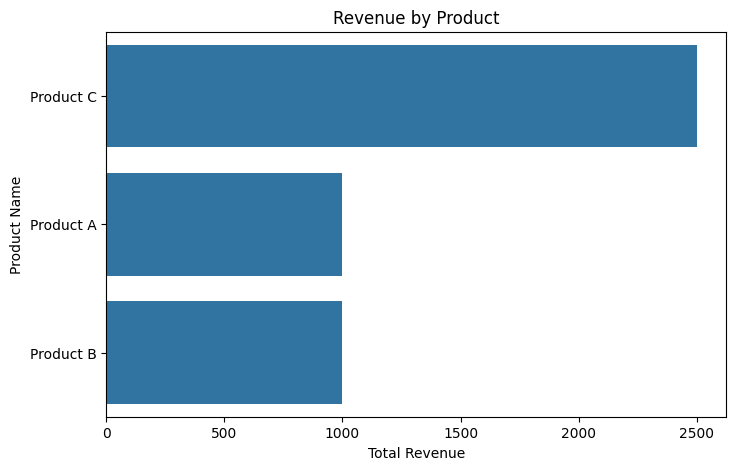

In [7]:
# Merge Sales with Product
sales_product = pd.merge(sales, products, on='ProductID')

revenue_by_product = sales_product.groupby('ProductName')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=revenue_by_product.values, y=revenue_by_product.index)
plt.title('Revenue by Product')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.show()


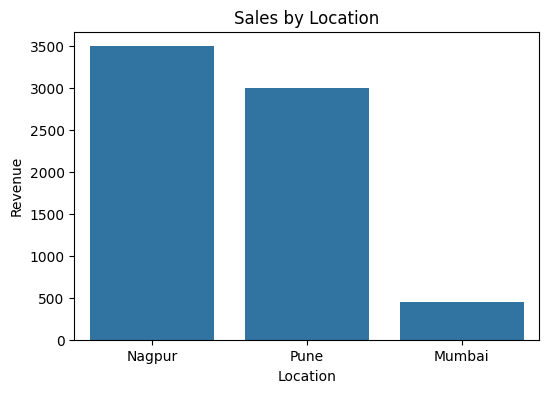

In [8]:
# Merge Sales with Customers
sales_customer = pd.merge(sales, customers, on='CustomerID')

sales_by_location = sales_customer.groupby('Location')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=sales_by_location.index, y=sales_by_location.values)
plt.title('Sales by Location')
plt.xlabel('Location')
plt.ylabel('Revenue')
plt.show()


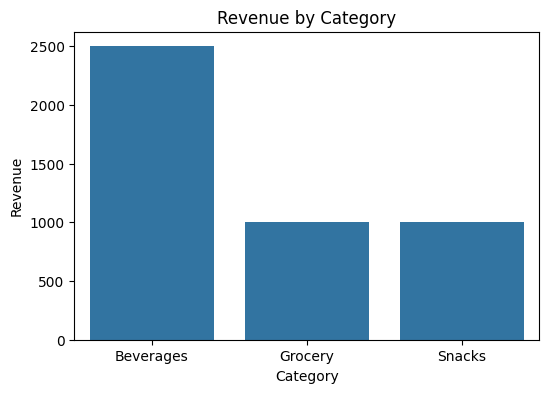

In [9]:
category_revenue = sales_product.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()


In [12]:
import pandas as pd

# Load Sales Data
sales_data = pd.read_excel(r'C:\Users\Yash\OneDrive\Desktop\Data Eng\Project\Data\sales.xlsx')

# Load Product Data
product_data = pd.read_excel(r'C:\Users\Yash\OneDrive\Desktop\Data Eng\Project\Data\products.xlsx')


In [13]:
# Merge sales and product data
merged_data = pd.merge(sales_data, product_data, on='ProductID')

# Calculate Profit per Sale
merged_data['Profit'] = (merged_data['SellingPrice'] - merged_data['CostPrice']) * merged_data['Quantity']

# View merged data
print(merged_data.head())


   InvoiceNo ProductID  Quantity  Price       Date CustomerID ProductName  \
0          1      P101         2    500 2024-01-01       C001   Product A   
1          2      P102         1   1000 2024-01-02       C002   Product B   
2          3      P103         5    500 2024-01-03       C001   Product C   

    Category  CostPrice  SellingPrice  Profit  
0    Grocery        400           500     200  
1     Snacks        850          1000     150  
2  Beverages        100           150     250  


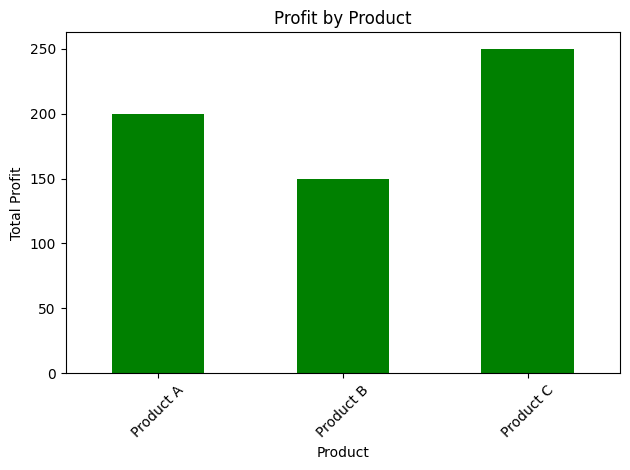

In [14]:
import matplotlib.pyplot as plt

# Profit by Product
profit_by_product = merged_data.groupby('ProductName')['Profit'].sum()

profit_by_product.plot(kind='bar', color='green')
plt.title('Profit by Product')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


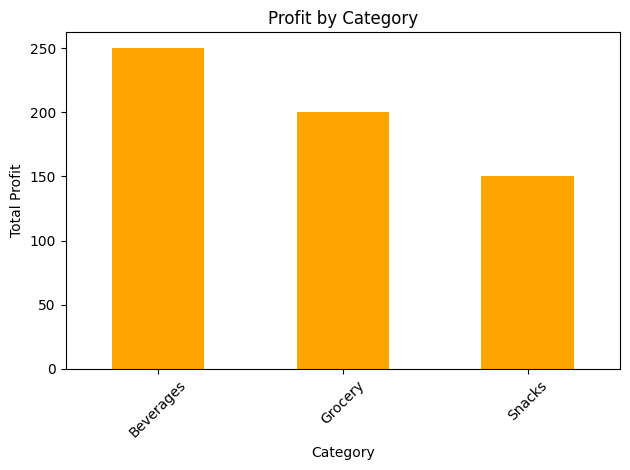

In [15]:
# Profit by Category
profit_by_category = merged_data.groupby('Category')['Profit'].sum()

profit_by_category.plot(kind='bar', color='orange')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


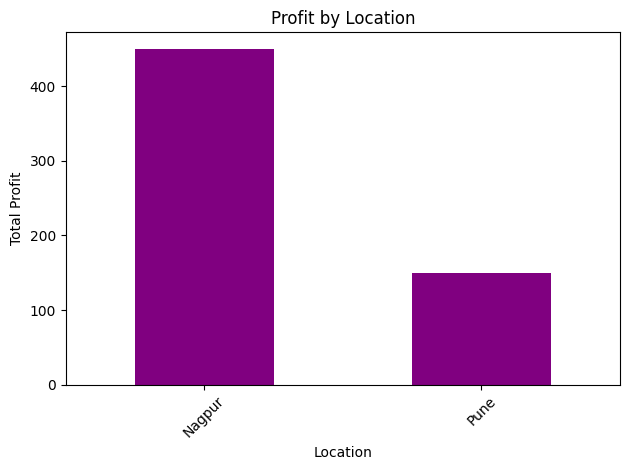

In [16]:
# Load Customer Data
customer_data = pd.read_excel(r'C:\Users\Yash\OneDrive\Desktop\Data Eng\Project\Data\customers.xlsx')

# Merge with customer data
merged_data = pd.merge(merged_data, customer_data, on='CustomerID')

# Profit by Location
profit_by_location = merged_data.groupby('Location')['Profit'].sum()

profit_by_location.plot(kind='bar', color='purple')
plt.title('Profit by Location')
plt.xlabel('Location')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
# Export Merged Data with Profit to Excel
merged_data.to_excel(r'C:\Users\Yash\OneDrive\Desktop\Data Eng\Project\final_output.xlsx', index=False)

print("Data Exported Successfully!")


Data Exported Successfully!
